<a href="https://colab.research.google.com/github/William9923/future-data-ecommerce-private/blob/master/notebooks/%F0%9F%A5%95PyCaret_BliSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret🥕 with Feature Engineering🛠 

---
Goals :
- Understanding which baseline model that we are trying to achieve using current data
- Automate modelling baseline

![image](https://ericonanalytics.com/wp-content/uploads/2021/01/image-13.png)

[PyCaret](https://pycaret.org/) is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

## ⚙️ Install PyCaret & Import Libraries

Use this command to install pycaret (colab & kaggle not including this sacred library)

> `pip install pycaret[full]`

In [2]:
!pip install pycaret[full]

     |████████████████████████████████| 266kB 4.3MB/s 
     |████████████████████████████████| 14.2MB 213kB/s 
     |████████████████████████████████| 256kB 37.0MB/s 
     |████████████████████████████████| 112kB 40.6MB/s 
     |████████████████████████████████| 1.4MB 31.5MB/s 
     |████████████████████████████████| 1.7MB 31.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 276kB 33.4MB/s 
     |████████████████████████████████| 2.0MB 35.8MB/s 
     |████████████████████████████████| 174kB 44.0MB/s 
     |████████████████████████████████| 6.8MB 25.8MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 40kB 5.6MB/s 
     |████████████████████████████████| 69.2MB 41kB/s 

In [3]:
# Call Library
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pycaret.regression import *

In [4]:
# Lets get the data - Because i'm poor, let's say i put it in Drive :>

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls drive/MyDrive/Blibli/data/processed

dataset-supervised.pkl		  IDN_geo_cleaned.csv
dataset-supervised-processed.pkl  seller_dataset_cleaned.csv
dataset-supervised-pycaret.pkl	  user_dataset_cleaned.csv


In [6]:
filename = "drive/MyDrive/Blibli/data/processed/dataset-supervised-pycaret.pkl"
data = pd.read_pickle(filename)

In [7]:
data.head()

,total_unique_item,product_volume_cm3_per_item,product_weight_g_per_item,order_date,order_day_of_week,order_day_of_month,order_quarter,order_is_weekend,order_hour,order_daytime,order_approved_date,order_approved_day_of_week,order_approved_day_of_month,order_approved_quarter,order_approved_is_weekend,order_approved_hour,order_approved_daytime,pickup_limit_date,pickup_limit_day_of_week,pickup_limit_day_of_month,pickup_limit_quarter,pickup_limit_is_weekend,estimated_date_delivery,actual_date_delivery,wd_approved_interval,wd_actual_delivery_interval,wd_estimated_delivery_interval,wd_pickup_limit_interval,is_same_area,log_shipping_cost,log_total_price,log_aov,cbrt_original_distance,log_pickup_distance,log_shipping_distance,log_delivering_distance,log_package_volume_cm3,log_package_weight_g,log_product_volume_cm3_per_item,log_product_weight_g_per_item
0,1,2700.0,200.0,2017-12-10,7,10,4.0,True,11,Afternoon,2017-12-10,7.0,10.0,4.0,True,12.0,Afternoon,2017-12-14,4,14,4.0,False,2018-01-04,2017-12-18,0,8,25,4,False,9.380168,9.898475,9.898475,8.589683,1.329263,2.857277,2.027167,7.901007,5.303305,7.901007,5.303305
1,1,5760.0,2000.0,2018-03-19,1,19,1.0,False,18,Evening,2018-03-20,2.0,20.0,1.0,False,18.0,Evening,2018-03-26,1,26,1.0,False,2018-03-29,2018-03-29,1,9,9,6,False,9.363147,11.891019,11.891019,8.196526,1.329263,2.857277,2.276990,8.658693,7.601402,8.658693,7.601402
2,1,1827.0,850.0,2018-07-02,1,2,3.0,False,13,Afternoon,2018-07-02,1.0,2.0,3.0,False,14.0,Afternoon,2018-07-06,5,6,3.0,False,2018-07-23,2018-07-04,0,2,21,4,False,9.341456,10.896554,10.896554,10.513610,1.329263,2.857277,2.626134,7.510431,6.746412,7.510431,6.746412
3,1,7866.0,468.0,2018-05-11,5,11,2.0,False,20,Evening,2018-05-11,5.0,11.0,2.0,False,20.0,Evening,2018-05-16,3,16,2.0,False,2018-05-22,2018-05-18,0,7,11,5,False,9.079206,11.877569,11.877569,8.352433,1.552185,2.857277,2.031957,8.970305,6.150603,8.970305,6.150603
4,1,40467.0,2500.0,2017-03-23,4,23,1.0,False,12,Afternoon,2017-03-23,4.0,23.0,1.0,False,13.0,Afternoon,2017-03-29,3,29,1.0,False,2017-04-20,2017-04-07,0,15,28,6,False,10.146865,11.607326,11.607326,7.323653,1.566181,2.857277,2.462932,10.608242,7.824446,10.608242,7.824446


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90183 entries, 0 to 95126
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   total_unique_item                90183 non-null  int64         
 1   product_volume_cm3_per_item      90183 non-null  float64       
 2   product_weight_g_per_item        90183 non-null  float64       
 3   order_date                       90183 non-null  datetime64[ns]
 4   order_day_of_week                90183 non-null  int64         
 5   order_day_of_month               90183 non-null  int64         
 6   order_quarter                    90183 non-null  float64       
 7   order_is_weekend                 90183 non-null  bool          
 8   order_hour                       90183 non-null  int64         
 9   order_daytime                    90183 non-null  object        
 10  order_approved_date              90183 non-null  datetime6

## 🔧 Setup Pycaret

To use pycaret's automl, you can basically enter the input data, the desired target column name, the number of folds of the cross validation, and the rest of the settings as desired.

There are many different settings you can put in. **Normalize, remove outliers, etc**. You can add your insights.

And here too, some missing values can be resolved, and `numeric_inmputation` was used to fill the numerical missing values with the median. (`Fare` feature)

In [9]:
target = 'wd_actual_delivery_interval'
detector = 'wd_estimated_delivery_interval'

cat_num_features =['order_quarter', 'order_is_weekend',
                  'order_approved_quarter', 'order_approved_is_weekend',
                  'pickup_limit_quarter', 'pickup_limit_is_weekend', "is_same_area"]
cat_str_features = ["order_daytime", "order_approved_daytime"]


date_feature = ['order_date', 'order_approved_date', "pickup_limit_date"]
hour_feature = ['order_hour', 'order_daytime', 'order_approved_hour', 'order_approved_daytime']

ignore_features = ['order_day_of_week', 'order_day_of_month', 'order_quarter', 
                  'order_approved_day_of_week', 'order_approved_day_of_month', 'order_approved_quarter',
                  'pickup_limit_day_of_week', 'pickup_limit_day_of_month', 'pickup_limit_quarter',
                   'estimated_date_delivery', 'actual_date_delivery']

regression = setup(
    data, 
    target = target, session_id=123, 
    log_experiment=True, 
    experiment_name='shipping-prediction',
    categorical_features = cat_num_features + cat_str_features,
    numeric_features = ['wd_approved_interval', 'total_unique_item'],
    date_features=date_feature,
    remove_multicollinearity=True,
    feature_selection=True,
    ignore_low_variance=True,
    ignore_features = [detector] + ignore_features,
    silent=True
)

,Description,Value
0,session_id,123
1,Target,wd_actual_delivery_interval
2,Original Data,"(90183, 40)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(63128, 73)"


## ✅ Benchmark

Models can be made individually, but they provide benchmarks by default.

It provides a benchmark by turning all representative models used in machine learning with a small number of iters.

Each model shows scores of **MAE, RMSE, MSE, R2 etc**.

In [10]:
best_model = compare_models(sort = 'RMSLE', 
                            include = ['catboost', 'xgboost', 'br','lr', 'ridge', 'ransac', 'knn','dt', 'rf'],
                            fold=5, 
                            n_select = 5
                            )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,3.6652,22.9532,4.7908,0.3732,0.4390,0.5064,16.444
xgboost,Extreme Gradient Boosting,3.7023,23.4585,4.8433,0.3594,0.4437,0.5089,20.368
rf,Random Forest Regressor,3.7948,24.2652,4.9258,0.3374,0.4553,0.5404,68.198
ridge,Ridge Regression,4.3614,32.3981,5.6819,0.1158,0.5274,0.6826,0.072
lr,Linear Regression,4.3680,32.4043,5.6828,0.1156,0.5318,0.6843,0.162
br,Bayesian Ridge,4.3625,32.4174,5.6835,0.1153,0.5276,0.6832,0.458
knn,K Neighbors Regressor,4.9280,38.9195,6.2385,-0.0629,0.5940,0.7857,1.110
dt,Decision Tree Regressor,5.2294,48.8952,6.9925,-0.3354,0.6214,0.6839,1.200
ransac,Random Sample Consensus,6.6191,92.4359,9.5263,-1.5214,0.7807,0.9542,0.580


## 🆕 Create Model

From above model comparison, lets pick 5 top best model :
- 

In [11]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.3367,29.9427,5.4720,0.1792,0.5224,0.6673
1,4.4121,30.6911,5.5400,0.1684,0.5359,0.7020
2,4.3435,30.4008,5.5137,0.1632,0.5266,0.6771
3,4.3830,30.5928,5.5311,0.1639,0.5260,0.6688
4,4.4384,47.9841,6.9271,-0.2745,0.5318,0.6909
5,4.3661,30.7274,5.5432,0.1550,0.5313,0.6840
6,4.3055,29.6480,5.4450,0.1761,0.5265,0.6779
7,4.3399,30.1307,5.4891,0.1715,0.5312,0.6830
8,4.3987,31.2868,5.5935,0.1600,0.5384,0.7004
9,4.3548,30.4014,5.5137,0.1611,0.5371,0.6942


In [12]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.3283,29.8865,5.4669,0.1807,0.5194,0.6649
1,4.4067,30.6597,5.5371,0.1693,0.5326,0.7000
2,4.3429,30.3914,5.5128,0.1635,0.5259,0.6772
3,4.3793,30.6098,5.5326,0.1635,0.5226,0.6673
4,4.4408,48.4608,6.9614,-0.2872,0.5324,0.6930
5,4.3599,30.7071,5.5414,0.1556,0.5282,0.6826
6,4.3003,29.6232,5.4427,0.1768,0.5246,0.6768
7,4.3298,30.1071,5.4870,0.1721,0.5248,0.6798
8,4.3968,31.2992,5.5946,0.1597,0.5365,0.6994
9,4.3457,30.3534,5.5094,0.1624,0.5290,0.6924


In [13]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7143,23.2160,4.8183,0.3636,0.4408,0.5114
1,3.7446,23.7509,4.8735,0.3565,0.4501,0.5273
2,3.7005,23.3439,4.8316,0.3575,0.4442,0.5221
3,3.7879,24.1958,4.9189,0.3388,0.4483,0.5199
4,3.7767,24.3205,4.9316,0.3540,0.4528,0.5347
5,3.7474,23.6770,4.8659,0.3489,0.4472,0.5259
6,3.6834,22.8147,4.7765,0.3660,0.4426,0.5196
7,3.6721,22.8722,4.7825,0.3711,0.4400,0.5135
8,3.7619,24.1493,4.9142,0.3517,0.4560,0.5359
9,3.7309,23.4358,4.8411,0.3533,0.4488,0.5337


In [14]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.6444,22.4407,4.7372,0.3848,0.4326,0.4945
1,3.6604,22.9071,4.7861,0.3793,0.4396,0.5063
2,3.6086,22.4679,4.7400,0.3816,0.4336,0.5029
3,3.7094,23.3746,4.8347,0.3612,0.4394,0.5008
4,3.7230,23.8476,4.8834,0.3666,0.4464,0.5174
5,3.6647,22.8880,4.7841,0.3706,0.4371,0.5036
6,3.6312,22.2373,4.7156,0.3820,0.4359,0.5045
7,3.5961,22.1930,4.7109,0.3897,0.4303,0.4931
8,3.6697,23.3581,4.8330,0.3729,0.4449,0.5131
9,3.6622,22.7246,4.7670,0.3729,0.4400,0.5156


## 🔄 Tune Model

We can use `tune_model` to tune the performance of your model.

Here I use the MSE metric to tune the model

In [15]:
tuned_catboost = tune_model(catboost, optimize = 'RMSE', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.6763,22.7326,4.7679,0.3768,0.4358,0.4992
1,3.7062,23.3367,4.8308,0.3677,0.4456,0.5156
2,3.6449,22.8963,4.7850,0.3698,0.4382,0.5089
3,3.7475,23.8020,4.8787,0.3495,0.4436,0.5079
4,3.7486,24.0903,4.9082,0.3601,0.4489,0.5231
5,3.6910,23.1023,4.8065,0.3647,0.4396,0.5081
6,3.6621,22.5223,4.7458,0.3741,0.4396,0.5111
7,3.6462,22.6785,4.7622,0.3764,0.4363,0.5020
8,3.7001,23.6148,4.8595,0.3660,0.4484,0.5186
9,3.6937,23.0324,4.7992,0.3644,0.4425,0.5201


## 📊 Plotting

### Regression Plot

To identify the residual result from output (prediction) vs actual

And it is good to look at the results and consider how to apply it to the ensemble.

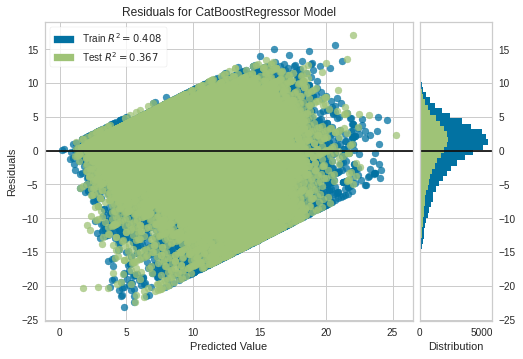

In [17]:
plot_model(tuned_catboost)

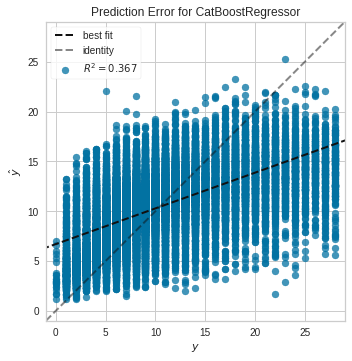

In [18]:
plot_model(tuned_catboost, "error")

## 🔥 End of AutoML!!